In [31]:
import numpy as np
import scipy.signal as ssig
import matplotlib.pyplot as plt
from scipy.fft import fft

In [32]:
## Utility function

def fft_plot(s, fs, name, plottitle, normalized_freq=False):
    """
    Plots the frequency domain representation (magnitude of FFT) of a discrete signal.

    :param s: signal (1D NumPy array)
    :param fs: Sampling frequency in Hz
    :param name: Name of the signal for labeling
    :param plottitle: Title of the plot
    :param normalized_freq: If True, normalize the frequency axis to [0, 1]
    """
    N = len(s)

    # Frequency axis
    f = np.linspace(0, fs, N)

    # Compute FFT
    s_f = fft(s)
    
    N = len(s_f)
    f_final = np.arange(0,N)/N if normalized_freq else f

    # Plot only frequency domain
    plt.figure(figsize=(10, 4))
    plt.plot(f_final, np.abs(s_f))
    plt.title(plottitle)
    plt.xlabel('f [Hz]')
    plt.ylabel('|' + name + '_F(f)|')
    plt.grid(True)
    plt.show()

In [33]:
## Simulated Data ##
rand = np.random.default_rng(42)

number_samples = 100
variance = 0.1

t_unevenly = np.array(sorted(100 * rand.random(number_samples)))
t_evenly = np.linspace(0, 1, 100)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y_evenly = np.sin(2 * np.pi * t_evenly)  + variance * rand.standard_normal(number_samples)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y_unevenly = np.sin(2 * np.pi * t_unevenly)  + variance * rand.standard_normal(number_samples)

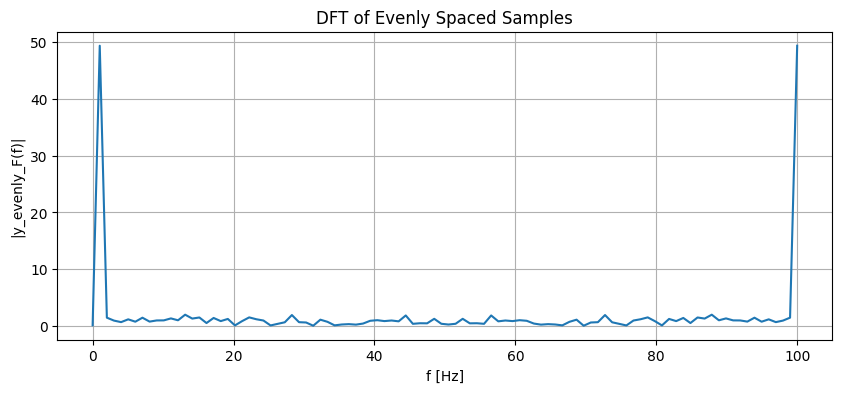

In [34]:
## Compute the DFT of the evenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
The following plot shows the peak at f = 1
'''

fft_plot(y_evenly, 100, 'y_evenly', 'DFT of Evenly Spaced Samples', normalized_freq=False)

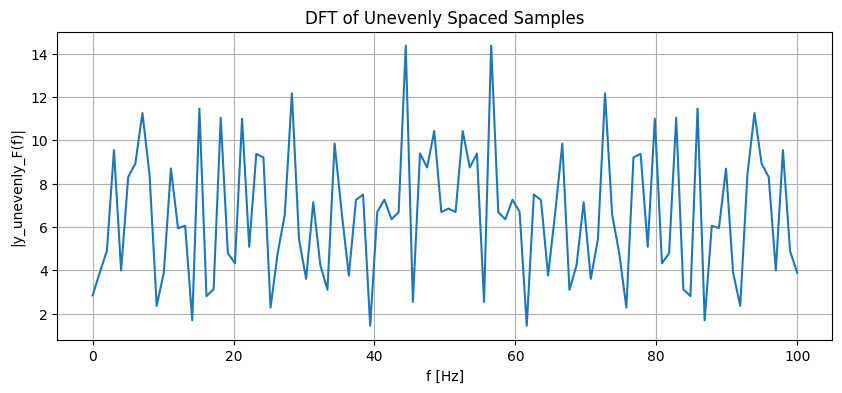

In [35]:
## Compute the DFT of the unevenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
The following plot shows nothing interesting as expected
'''

fft_plot(y_unevenly, 100, 'y_unevenly', 'DFT of Unevenly Spaced Samples', normalized_freq=False)

Text(0.5, 1.0, 'Periodogram estimate')

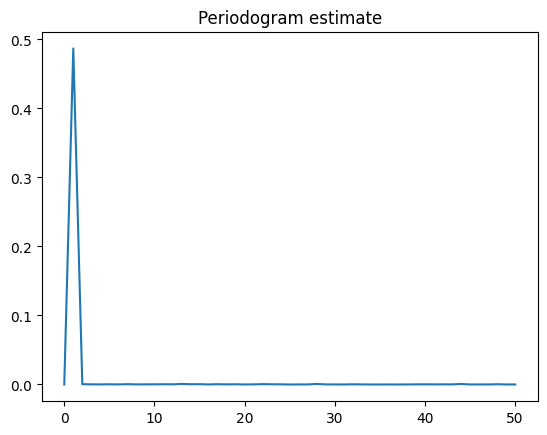

In [ ]:
## Compute the Periodogram of the evenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
The following plot shows the peak at f = 1
'''

freqs , Sper = ssig.periodogram(y_evenly, fs=100.0, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs, Sper)
ax.set_title("Periodogram")

Text(0.5, 1.0, 'Periodogram estimate')

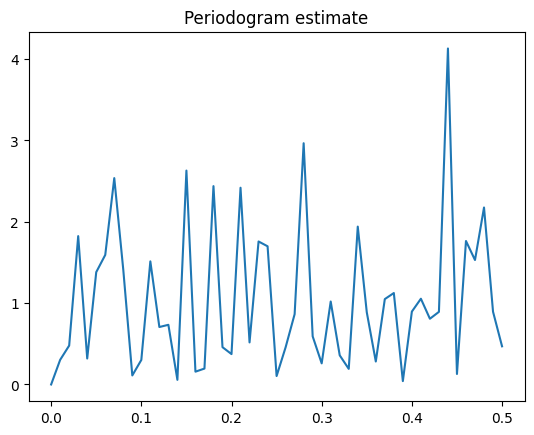

In [ ]:
## Compute the Periodogram of the unevenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
The following plot shows nothing interesting as expected
'''

freqs , Sper = ssig.periodogram(y_unevenly, fs=1.0, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs, Sper)
ax.set_title("Periodogram")

# Real Data

In this section, we have been able to generate ECG signals and retrieve RR intervals from them using a real hardware. All information can be found in the PDF report 1. As before, we load and compute the DFT and periodogram. 2 recordings have been made but for this report, only the second one is being shown. To compute the RR intervals, we used a Python library called neurokit2. The script that handled that is `extract_rr.py`

Text(0, 0.5, 'Time [s]')

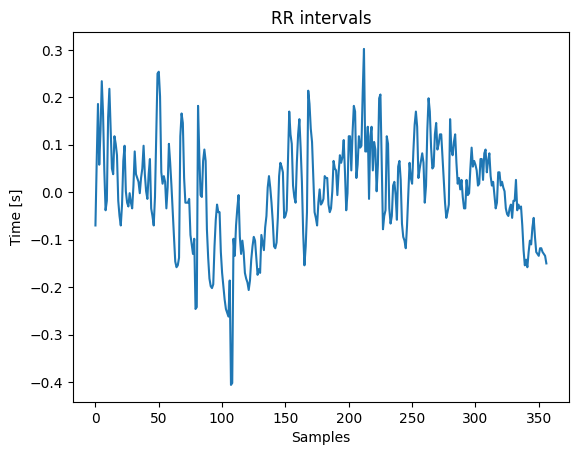

In [41]:
RR_signal = np.load('/home/giovanni/Documents/EPFL/SSDP/project/SSDP-LombScargle/RR-2.npy')

# Remove the DC component
mean=np.mean(RR_signal)
RR_signal=RR_signal-mean
plt.plot(RR_signal)

plt.title("RR intervals")
plt.xlabel('Samples')
plt.ylabel('Time [s]')

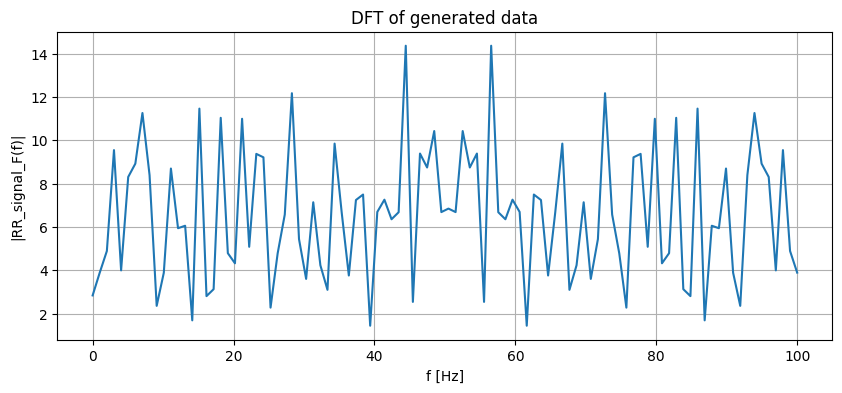

In [39]:
## Compute the DFT of the generated data ##

'''
Computing the DFT has not meaning as the data is not evenly sampled
'''

fft_plot(y_unevenly, 100, 'RR_signal', 'DFT of generated data', normalized_freq=False)

Text(0.5, 0, 'Normalized frequencies')

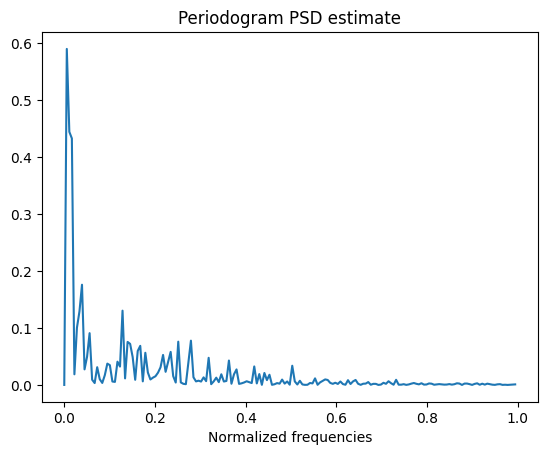

In [ ]:
## Compute the Periodogram of the generated data ##

'''

We plot in normamized frequencies
'''

freqs , Sper = ssig.periodogram(RR_signal, fs=1.0, return_onesided=True)  
N = len(Sper)
freqsNorm = np.arange(0,N)/N
fig, ax = plt.subplots()
plt.plot(freqsNorm,Sper)
ax.set_title("Periodogram")
plt.xlabel('Normalized frequencies')